In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict

In [2]:
churn_df = pd.read_csv("../data/churn_train.csv")
X = churn_df.drop(['churn_label'], axis=1)
y = churn_df.churn_label

In [3]:
print X.shape, y.shape

(572171, 21) (572171,)


In [4]:
RANDOM_SEED = 24
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = RANDOM_SEED
)

In [5]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt' ({:d})".format(int(np.sqrt(X_train.shape[1]))),
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.3 ({})".format(int(0.3 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.3,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.5 ({})".format(int(0.5 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.5,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.7 ({})".format(int(0.7 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.7,
                               oob_score=True,
                               random_state=RANDOM_SEED))
]

error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [6]:
%%time
# Range of `n_estimators` values to explore.
min_estimators = 50
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators+1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

CPU times: user 41min 30s, sys: 1min 2s, total: 42min 33s
Wall time: 42min 49s


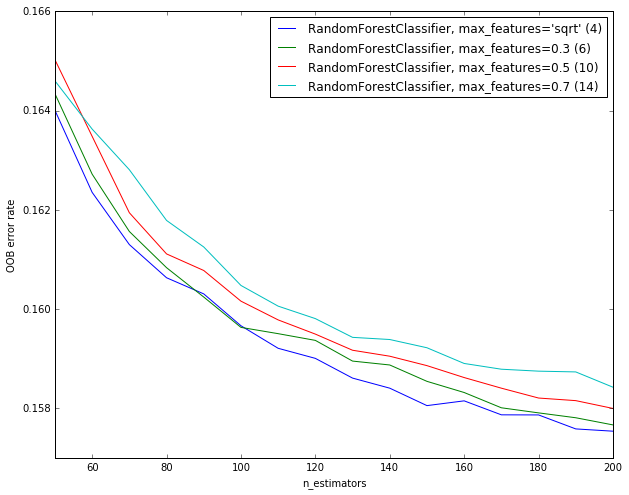

In [7]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
f = plt.figure(figsize=(10, 8))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

    plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()
f.savefig("../demo_day/rf_oob_error.png", dpi='figure')

In [11]:
pd.DataFrame(error_rate)

,"RandomForestClassifier, max_features='sqrt' (4)","RandomForestClassifier, max_features=0.3 (6)","RandomForestClassifier, max_features=0.5 (10)","RandomForestClassifier, max_features=0.7 (14)"
0,"(50, 0.164007200657)","(50, 0.164341454463)","(50, 0.165027439397)","(50, 0.164601429645)"
1,"(60, 0.162353408952)","(60, 0.162720432739)","(60, 0.163482880962)","(60, 0.163629253544)"
2,"(70, 0.161300400231)","(70, 0.161564744744)","(70, 0.161942691857)","(70, 0.16281000402)"
3,"(80, 0.160631892619)","(80, 0.160835066501)","(80, 0.161112519007)","(80, 0.161787580614)"
4,"(90, 0.160306377475)","(90, 0.160243022179)","(90, 0.160778265201)","(90, 0.161252337592)"
5,"(100, 0.159664085849)","(100, 0.159631315868)","(100, 0.160160004894)","(100, 0.160476781376)"
6,"(110, 0.159209675446)","(110, 0.159504605275)","(110, 0.15978205778)","(110, 0.160059510285)"
7,"(120, 0.159006501564)","(120, 0.15936915602)","(120, 0.159495866613)","(120, 0.159808273765)"
8,"(130, 0.158608892462)","(130, 0.158951884929)","(130, 0.159170351469)","(130, 0.159430326651)"
9,"(140, 0.15840571858)","(140, 0.158873236975)","(140, 0.159050194872)","(140, 0.159386633343)"


In [14]:
%%time
for label, clf in ensemble_clfs:
    for i in range(210, 301+1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

CPU times: user 28min 28s, sys: 1min 9s, total: 29min 37s
Wall time: 29min 44s


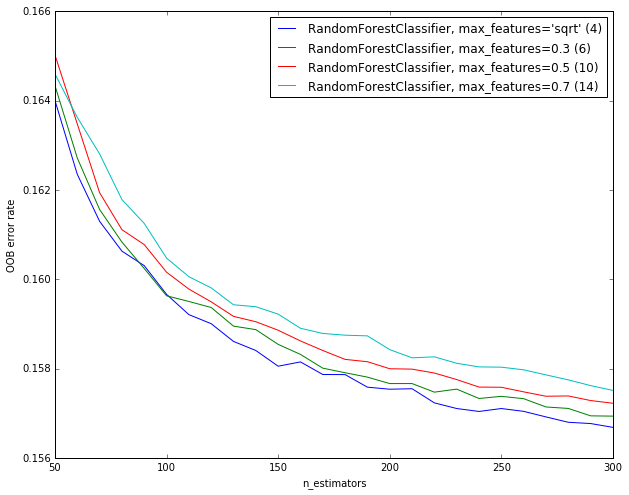

In [18]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
f = plt.figure(figsize=(10, 8))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    plt.xlim(50, 300)

plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()
f.savefig("../demo_day/rf_oob_error.png", dpi='figure')
# it seems like the oob curves still have the tendency to go down

In [19]:
pd.DataFrame(error_rate)

,"RandomForestClassifier, max_features='sqrt' (4)","RandomForestClassifier, max_features=0.3 (6)","RandomForestClassifier, max_features=0.5 (10)","RandomForestClassifier, max_features=0.7 (14)"
0,"(50, 0.164007200657)","(50, 0.164341454463)","(50, 0.165027439397)","(50, 0.164601429645)"
1,"(60, 0.162353408952)","(60, 0.162720432739)","(60, 0.163482880962)","(60, 0.163629253544)"
2,"(70, 0.161300400231)","(70, 0.161564744744)","(70, 0.161942691857)","(70, 0.16281000402)"
3,"(80, 0.160631892619)","(80, 0.160835066501)","(80, 0.161112519007)","(80, 0.161787580614)"
4,"(90, 0.160306377475)","(90, 0.160243022179)","(90, 0.160778265201)","(90, 0.161252337592)"
5,"(100, 0.159664085849)","(100, 0.159631315868)","(100, 0.160160004894)","(100, 0.160476781376)"
6,"(110, 0.159209675446)","(110, 0.159504605275)","(110, 0.15978205778)","(110, 0.160059510285)"
7,"(120, 0.159006501564)","(120, 0.15936915602)","(120, 0.159495866613)","(120, 0.159808273765)"
8,"(130, 0.158608892462)","(130, 0.158951884929)","(130, 0.159170351469)","(130, 0.159430326651)"
9,"(140, 0.15840571858)","(140, 0.158873236975)","(140, 0.159050194872)","(140, 0.159386633343)"


In [20]:
pd.DataFrame(error_rate).to_csv('../demo_day/oob_error.csv', index=False)

In [24]:
ensemble_clfs_2 = [
    ("RandomForestClassifier, max_features='sqrt' ({:d})".format(int(np.sqrt(X_train.shape[1]))),
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.3 ({})".format(int(0.3 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.3,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.5 ({})".format(int(0.5 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.5,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.7 ({})".format(int(0.7 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.7,
                               oob_score=True,
                               random_state=RANDOM_SEED))
]

error_rate_2 = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [25]:
%%time
# Range of `n_estimators` values to explore.
for label, clf in ensemble_clfs_2:
    for i in range(40, 50, 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate_2[label].append((i, oob_error))

CPU times: user 10min 22s, sys: 18.7 s, total: 10min 41s
Wall time: 10min 47s


In [26]:
pd.DataFrame(error_rate_2)

,"RandomForestClassifier, max_features='sqrt' (4)","RandomForestClassifier, max_features=0.3 (6)","RandomForestClassifier, max_features=0.5 (10)","RandomForestClassifier, max_features=0.7 (14)"
0,"(40, 0.16625085202)","(40, 0.166620060472)","(40, 0.166816680357)","(40, 0.167155303494)"
1,"(41, 0.166034570145)","(41, 0.166414701924)","(41, 0.166807941696)","(41, 0.167013300243)"
2,"(42, 0.165855427583)","(42, 0.166161280738)","(42, 0.16647368789)","(42, 0.166906251638)"
3,"(43, 0.165477480469)","(43, 0.165995246168)","(43, 0.1662268207)","(43, 0.166772987049)"
4,"(44, 0.165217505287)","(44, 0.165630407047)","(44, 0.165947183529)","(44, 0.166395039936)"
5,"(45, 0.165112641348)","(45, 0.165239351941)","(45, 0.165776779628)","(45, 0.166080448119)"
6,"(46, 0.164666969607)","(46, 0.165101718021)","(46, 0.16564788437)","(46, 0.165816103606)"
7,"(47, 0.16449001171)","(47, 0.164804603527)","(47, 0.165383539857)","(47, 0.165368247199)"
8,"(48, 0.164404809759)","(48, 0.164586136987)","(48, 0.165009962074)","(48, 0.165047101386)"
9,"(49, 0.164247513851)","(49, 0.16459924498)","(49, 0.165018700736)","(49, 0.164863589493)"


In [27]:
for label, clf_err in error_rate.items():
    error_rate_2[label].extend(clf_err)

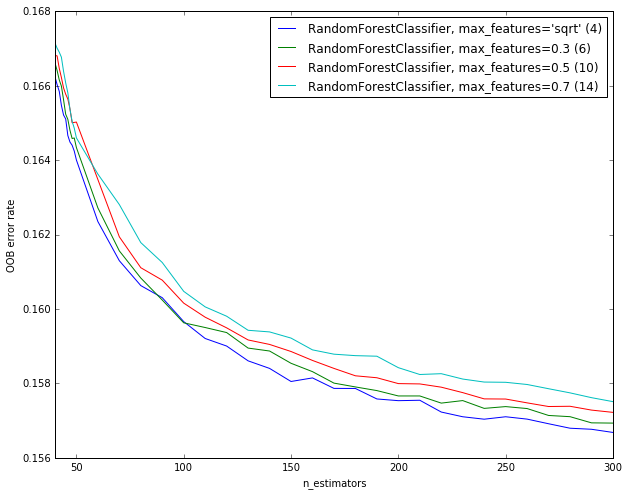

In [29]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
f = plt.figure(figsize=(10, 8))

for label, clf_err in error_rate_2.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    plt.xlim(40, 300)

plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()
f.savefig("../demo_day/rf_oob_error.png", dpi='figure')
# it seems like the oob curves still have the tendency to go down

In [30]:
# The best max_feature should be 'sqrt' by default in terms of oob_error
# confirm again with the oob_auc
ensemble_clfs_3 = [
    ("RandomForestClassifier, max_features='sqrt' ({:d})".format(int(np.sqrt(X_train.shape[1]))),
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.3 ({})".format(int(0.3 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.3,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.5 ({})".format(int(0.5 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.5,
                               oob_score=True,
                               random_state=RANDOM_SEED)),
    ("RandomForestClassifier, max_features=0.7 ({})".format(int(0.7 * X_train.shape[1])),
        RandomForestClassifier(warm_start=True, max_features=0.7,
                               oob_score=True,
                               random_state=RANDOM_SEED))
]
error_auc = OrderedDict((label, []) for label, _ in ensemble_clfs_3)

In [31]:
%%time
# Range of `n_estimators` values to explore.
for label, clf in ensemble_clfs_3:
    i = 300
    clf.set_params(n_estimators=i)
    clf.fit(X_train, y_train)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_predprob = clf.oob_decision_function_[:, 1]
    oob_auc = metrics.roc_auc_score(y_train, oob_predprob)
    error_auc[label].append((i, oob_auc))

CPU times: user 47min 45s, sys: 45.7 s, total: 48min 31s
Wall time: 48min 54s


In [33]:
pd.DataFrame(error_auc)

,"RandomForestClassifier, max_features='sqrt' (4)","RandomForestClassifier, max_features=0.3 (6)","RandomForestClassifier, max_features=0.5 (10)","RandomForestClassifier, max_features=0.7 (14)"
0,"(300, 0.903457101854)","(300, 0.903348900508)","(300, 0.903161010902)","(300, 0.902896257547)"
